<a href="https://colab.research.google.com/github/sid1336/Computational-physics/blob/main/a8_feedback_80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

utkarsh sachdeva SID
<br>
Due date: Mar. 12, 2024, 11:59pm
<br>
PHYS 2030 W24


# <center><font color=#46769B>Homework assignment 8</font></center>

__Rubric (100 points total)__:

- Problem 1a - __30 points__

- Problem 1b - __30 points__
     
- Problem 2 - __40 points__

</font>

## <font color=#46769B>Introduction: Higher-order methods for solving Initial Value Problems (IVPs)</font>


Our goals for this notebook are:
- Gain experience with Runge-Kutta (RK) and leapfrog methods.

Required reading:
- *Lesson 8: Higher-order methods*

- *Lesson 9: Leapfrog method*

## <font color=#46769B>Problem 1: Kapitza's pendulum</font>

### <font color=#46769B>Introduction</font>

Kapitza's pendulum is a pendulum in which the pivot is attached to a motor that causes the pivot to move up and down.

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/KapitzaPendulumScheme.gif" width="240">
</div>

We assume that the vertical motion of the pivot is periodic, described by

$$y(t) = A \, \cos(\nu t)$$

where $A$ is the amplitude and $\nu$ is the angular frequency of the pivot's motion up and down. Recalling that the formula for torque is $\tau = F \ell \sin(\theta)$, where $F = m y''(t)$ is the force due to the pivot's motion on the pendulum arm and $\theta$ is the relative angle between the pendulum and the vertical, we arrive an equation of motion:

$$\theta''(t) + \omega^2 \sin(\theta(t)) + A \nu^2 \cos(\nu t) \sin(\theta(t)) = 0\, . \qquad (1)$$

The usual simple pendulum (recoved by setting $A=0$ above) has two equilibrium positions:

- Stable equilibrium point at $\theta=0$ (hanging straight down). A small push away from $\theta=0$ will lead to small oscillations around the point $\theta=0$.

- Unstable equilibrium point at $\theta = \pi$ (pointing straight up). An arbitrarily small push away from $\theta=\pi$ will lead to a large displacement.

The unusual feature of Kapitsa's pendulum is that a rapid driving force can cause the unstable point at $\theta=\pi$ *to become stable*. Here are one [video](https://www.youtube.com/watch?v=cjGqxF79ITI) and another [video](https://www.youtube.com/watch?v=GgYABmG_bto) that illustrate this phenomenon in action. (Some further links for the interested reader are [here](https://gereshes.com/2019/02/25/kapitzas-pendulum/) and [here](https://en.wikipedia.org/wiki/Kapitza%27s_pendulum).)

### <font color=#46769B>Part (a)</font>

Your tasks are as follows:

- Write a code to solve the equation of motion (1) for Kapitza's pendulum for the initial condition $ \theta(0) = 3$ and $\theta'(0) = 0$, over the time interval $[0,10]$, using the RK4 method. As in previous exercises, perform a convergence test to check that your results have converged to within a tolerance of `atol=rtol=1e-2`. Take the following numerical inputs

$$\omega = 2\pi , \quad A = 0.1, \quad \nu = 100$$

- Make a plot showing $\theta(t)$ vs $t$ for Kapitsa's pendulum. Show also in the same plot, $\theta(t)$ vs $t$ for the simple pendulum with the same initial condition (i.e., solving the same ODE but with $A=0$). Include a legend and axes labels for your plot.

- Make a __phase portrait__ plot of $\theta'(t)$ vs $\theta(t)$ for both Kapitsa's pendulum and the simple pendulum (in separate plots). This plot is a nice way to visualize both position and velocity of a trajectory. It is easy to implement from your numerical solutions. Suppose your solutions are saved in a `numpy.array` named `y`, which has size $(N+1) \times 2$. Then you simply do:
```py
theta = y[:,0]
theta_prime = y[:,1]
plt.plot(theta,theta_prime)
```
since recall $\mathbf{y} = (\theta,\theta^\prime)$. Make your plot a square shape using the `figsize` keyword.

Feel free to use `scipy.integrate.solve_ivp` to check your numerical results, but it is not mandatory. Note if you do use `solve_ivp`, it may be useful to increase the tolerance settings by adding thse keywords, e.g., `atol=1e-10, rtol=1e-10`.


Not converged yet. Trying 2000 steps.
Not converged yet. Trying 4000 steps.
Not converged yet. Trying 8000 steps.
RK4 method converged with 8000 steps.



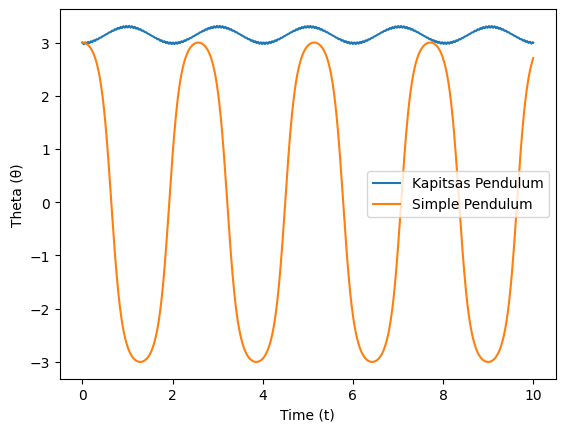

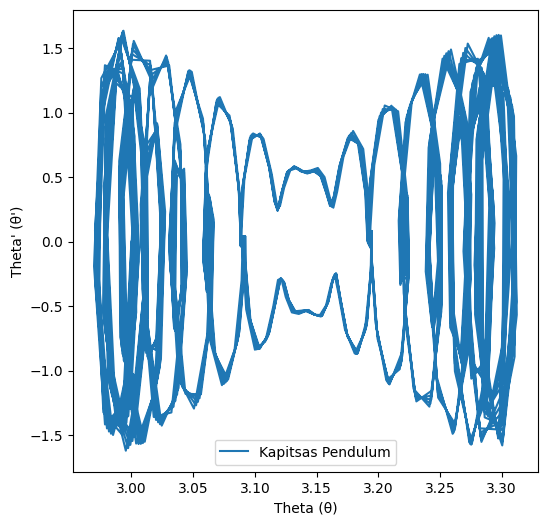

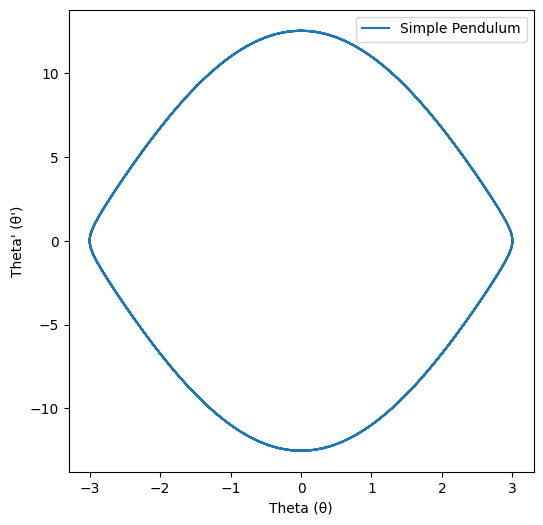

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(t, y, omega, A, v):
    theta1, theta2 = y
    return np.array([theta2, -omega**2 * np.sin(theta1) - A * v**2 * np.cos(v * t) * np.sin(theta1)])

def RK4(num_steps, y0, omega, A, v):
    t0, tf = 0, 10
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = t[1] - t[0]

    y = np.zeros((num_steps + 1, 2))
    y[0] = y0

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi, omega, A, v)
        k2 = f(ti + h/2, yi + h * k1 / 2, omega, A, v)
        k3 = f(ti + h/2, yi + h * k2 / 2, omega, A, v)
        k4 = f(ti + h, yi + h * k3, omega, A, v)
        k = (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)

        y[i + 1] = yi + h * k

    return t, y

def convergence_test(y_old, y_new, num_steps):
    return np.allclose(y_old, y_new[::2], atol=1e-2, rtol=1e-2)

def plot_pendulum(t, theta, label):
    plt.plot(t, theta[:, 0], label=label)

def plot_phase_space(theta, label):
    plt.figure(figsize=(6, 6))
    theta_a = theta[:, 0]
    theta_prime_a = theta[:, 1]
    plt.plot(theta_a, theta_prime_a, label=label)
    plt.legend()
    plt.xlabel('Theta (θ)')
    plt.ylabel('Theta\' (θ\')')
    plt.show()

def main():
    omega = 2 * np.pi
    v = 100
    A = 0.1
    theta0 = np.array([3, 0])
    num_steps = 1000

    t_old, y_old = RK4(num_steps, theta0, omega, A, v)
    converged = False

    while not converged:
        num_steps *= 2
        print("Not converged yet. Trying", num_steps, "steps.")
        t, y_new = RK4(num_steps, theta0, omega, A, v)
        converged = convergence_test(y_old, y_new, num_steps)
        y_old = y_new

    print(f"RK4 method converged with {num_steps} steps.\n")

    t1, theta1 = RK4(1000, theta0, omega, A, v)
    A = 0
    t2, theta2 = RK4(1000, theta0, omega, A, v)

    # Plotting
    plot_pendulum(t1, theta1, 'Kapitsas Pendulum')
    plot_pendulum(t2, theta2, 'Simple Pendulum')
    plt.xlabel('Time (t)')
    plt.ylabel('Theta (θ)')
    plt.legend()
    plt.show()

    plot_phase_space(theta1, 'Kapitsas Pendulum')
    plot_phase_space(theta2, 'Simple Pendulum')

if __name__ == "__main__":
    main()


## <font color=#46769B>Part (b)</font>

In Part (a), you noticed that Kapitza's pendulum seems to oscillate around an equilibrium $\theta_{\rm eq} = \pi$, while the simple pendulum oscillates around $\theta_{\rm eq} = 0$. A simple way to see this more clearly is to include a damping term

$$\theta''(t) + \gamma \theta'(t) + \omega^2 \sin(\theta(t)) + A \nu^2 \cos(\nu t) \sin(\theta(t)) = 0\, \qquad (2)$$

and seeing where the pendulum ends up after its motion has been damped away, i.e.,

$$\theta(t_f) \approx \theta_{\rm eq} \, .$$

Here set $\gamma = 1$ and consider the same time interval $[0,10]$.

Your task is:

- Repeat the tasks of Part (a), with solving Eq. (2) instead of Eq. (1).

- Determine $\theta_{\rm eq}$.

Next, consider the following more general initial condition

$$\theta(0) = \theta_0, \quad \theta'(0) = 0 \, ,$$

that is, an arbitrary initial displacement $\theta_0$. It turns out that for small initial displacements $\theta_0$, the Kapitza's pendulum will relax to zero (hanging down), while for larger initial displacements, the pendulum will relax to hanging straight up.

- Determine the value of $\theta_{\rm eq}$ as a function of the initial displacement $\theta_0$. Plot your results for $\theta_{\rm eq}$ as a function of $\theta_0$.

- Determine the critical initial displacement value for $\theta_0$ below which Kapitza's pendulum relaxes to $\theta_{\rm eq} = 0$ and above which it relaxes to $\theta_{\rm eq} = \pi$.



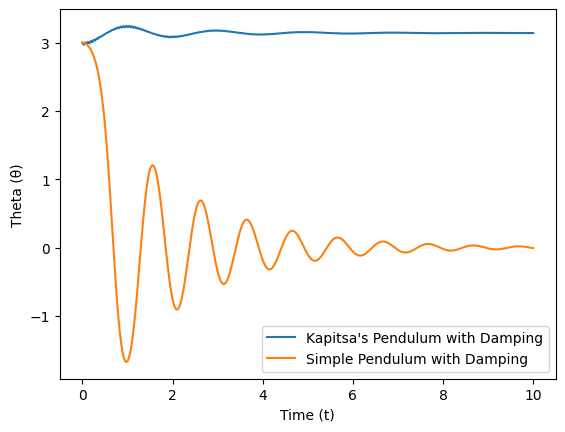

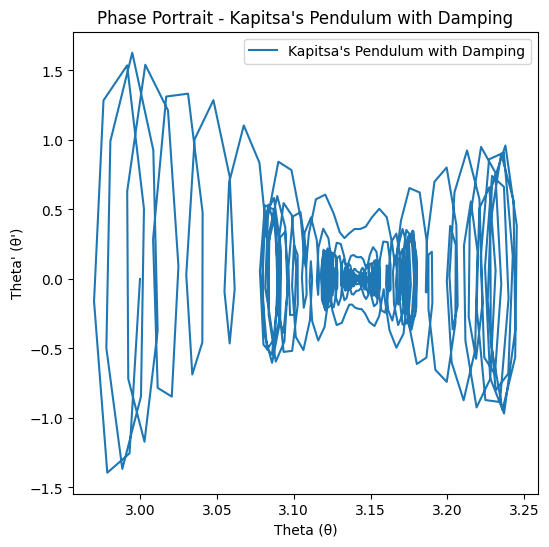

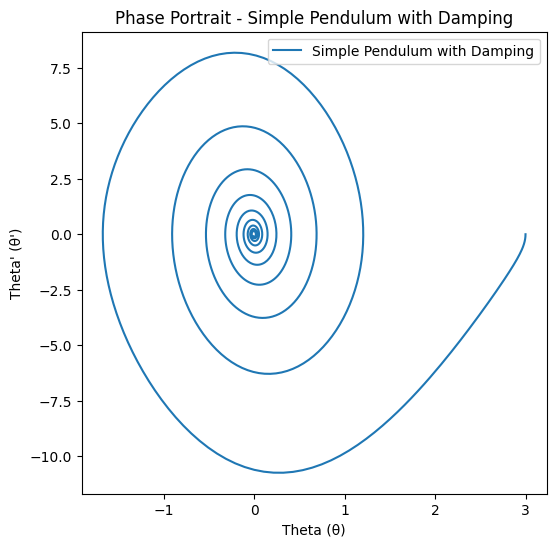

After N = 1000, theta for Kapitzas pendulum appears to come to a rest point at 3.140677638673509 with damping


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def damped_pendulum(t, y, omega, gamma, A, v):
    theta, theta_prime = y
    return np.array([theta_prime, -gamma * theta_prime - omega**2 * np.sin(theta) - A * v**2 * np.cos(v * t) * np.sin(theta)])

def solve_damped_pendulum(omega, gamma, A, v, theta0, num_steps):
    t_span = [0, 10]
    t_eval = np.linspace(t_span[0], t_span[1], num_steps + 1)

    solution = solve_ivp(
        damped_pendulum, t_span, theta0,
        args=(omega, gamma, A, v),
        method='RK45', t_eval=t_eval, max_step=(t_span[1] - t_span[0]) / num_steps
    )

    return solution.t, solution.y[0], solution.y[1]

def plot_pendulum(t, theta, label):
    plt.plot(t, theta, label=label)

def plot_phase_space(theta, theta_prime, label):
    plt.figure(figsize=(6, 6))
    plt.plot(theta, theta_prime, label=label)
    plt.legend()
    plt.xlabel('Theta (θ)')
    plt.ylabel("Theta' (θ')")
    plt.title(f'Phase Portrait - {label}')
    plt.show()

# Parameters
omega = 2 * np.pi
v = 100
A = 0.1
theta0 = np.array([3, 0])
num_steps = 1000
gamma = 1

# Solve damped Kapitza's pendulum
t_kapitza, theta_kapitza, theta_prime_kapitza = solve_damped_pendulum(omega, gamma, A, v, theta0, num_steps)

# Solve damped simple pendulum
A = 0
t_simple, theta_simple, theta_prime_simple = solve_damped_pendulum(omega, gamma, A, v, theta0, num_steps)

# Plotting
plot_pendulum(t_kapitza, theta_kapitza, 'Kapitsa\'s Pendulum with Damping')
plot_pendulum(t_simple, theta_simple, 'Simple Pendulum with Damping')
plt.xlabel('Time (t)')
plt.ylabel('Theta (θ)')
plt.legend()
plt.show()

plot_phase_space(theta_kapitza, theta_prime_kapitza, 'Kapitsa\'s Pendulum with Damping')
plot_phase_space(theta_simple, theta_prime_simple, 'Simple Pendulum with Damping')

print(f'After N = 1000, theta for Kapitzas pendulum appears to come to a rest point at {theta_kapitza[1000]} with damping')


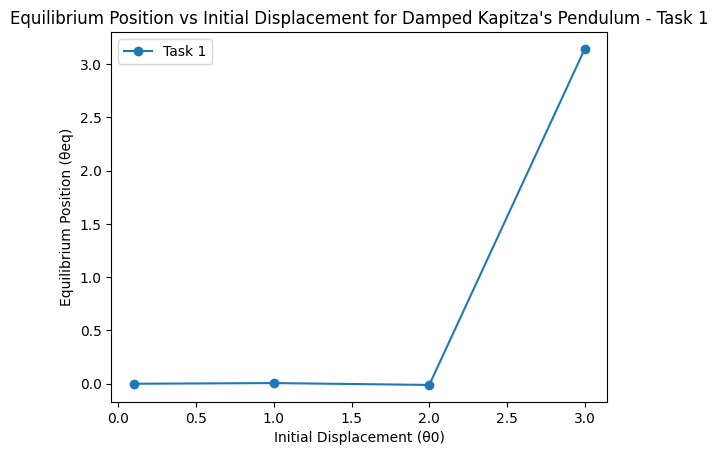

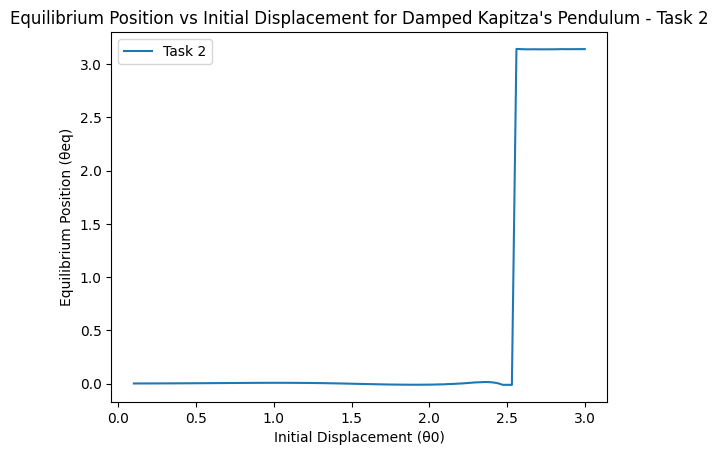

The critical initial displacement is at 2.561.
 If initial theta > 2.561 then θeq=0, if Initial theta < 2.561 then θeq=π


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Function to solve the damped Kapitzas Pendulum equation
def damped_kapitzas_pendulum(t, y, omega, gamma, A, nu):
    theta, theta_prime = y
    return np.array([theta_prime, -gamma * theta_prime - omega**2 * np.sin(theta) - A * nu**2 * np.cos(nu * t) * np.sin(theta)])

# Function to find equilibrium positions for different initial displacements
def find_equilibrium(theta0_values, omega, gamma, A, nu, num_steps):
    equilibrium_values = []
    for theta0 in theta0_values:
        solution = solve_ivp(
            damped_kapitzas_pendulum, [0, 10], [theta0, 0],
            args=(omega, gamma, A, nu),
            method='RK45', t_eval=np.linspace(0, 10, num_steps + 1)
        )
        equilibrium_values.append(solution.y[0, -1])
    return equilibrium_values

# Function to find the critical initial displacement value
def find_critical_initial_displacement(theta0_values, equilibrium_values):
    critical_theta0 = None
    for theta0, equilibrium in zip(theta0_values[::-1], equilibrium_values[::-1]):
        if equilibrium > np.pi:
            critical_theta0 = theta0
            break
    return critical_theta0

# Parameters
omega = 2 * np.pi
gamma = 1
A = 0.1
nu = 100
num_steps = 1000

# Task 1: Solve Eq. (2) and determine θeq
theta0_values_task1 = np.array([0.1, 1, 2, 3])
equilibrium_values_task1 = find_equilibrium(theta0_values_task1, omega, gamma, A, nu, num_steps)

# Task 2: Determine θeq as a function of θ0
theta0_values_task2 = np.linspace(0.1, 3, 100)
equilibrium_values_task2 = find_equilibrium(theta0_values_task2, omega, gamma, A, nu, num_steps)

# Task 3: Determine the critical initial displacement value
critical_theta0 = find_critical_initial_displacement(theta0_values_task2, equilibrium_values_task2)

# Plotting Task 1
plt.plot(theta0_values_task1, equilibrium_values_task1, marker='o', linestyle='-', label='Task 1')
plt.xlabel('Initial Displacement (θ0)')
plt.ylabel('Equilibrium Position (θeq)')
plt.title('Equilibrium Position vs Initial Displacement for Damped Kapitza\'s Pendulum - Task 1')
plt.legend()
plt.show()

# Plotting Task 2
plt.plot(theta0_values_task2, equilibrium_values_task2, label='Task 2')
plt.xlabel('Initial Displacement (θ0)')
plt.ylabel('Equilibrium Position (θeq)')
plt.title('Equilibrium Position vs Initial Displacement for Damped Kapitza\'s Pendulum - Task 2')
plt.legend()
plt.show()

# Output Task 3
print(f'The critical initial displacement is at {critical_theta0:.3f}.\n If initial theta > {critical_theta0:.3f} then θeq=0, if Initial theta < {critical_theta0:.3f} then θeq=π')


## <font color=#46769B>Problem 2: Leapfrog method</font>

Consider a __simple pendulum__, given by the equation of motion

$$\theta''(t) + \omega^2 \sin(\theta(t)) = 0 \, , $$

with $\omega = 2\pi$, and the boundary condition

$$\theta(0) = 1 , \quad \theta'(0) = 0 \, .$$

Perform the following tasks:

- Write a function `leapfrog(num_steps)` (using a `def` statement) to implement the __leapfrog method__ for this system (kick-drift-kick algorithm) for the time interval $[0,5]$, where `num_steps` refers to the number of steps $N$. Your function should `return t, x, v`, so that you can call it as follows:
```py
t, x, v = leapfrog(num_steps)
```
where `t`, `x`, `v` are all `numpy.arrays` of length $N+1$. (To make the syntax clear with Lesson 9, note that $x(t) = \theta(t)$ is the displacement and $v(t) = \theta'(t)$ is the velocity of the pendulum.)

- Repeat the tasks of Exercise 8, Parts (a) and (c), using the leapfrog method. Include in your figures the results from the RK methods (using your code from Exercise 8) as well.

You should find that the leapfrog method has a better behavior with respect to energy conservation than RK methods. Specifically, although energy is not exactly conserved, the $\Delta E$ does not grow in time.

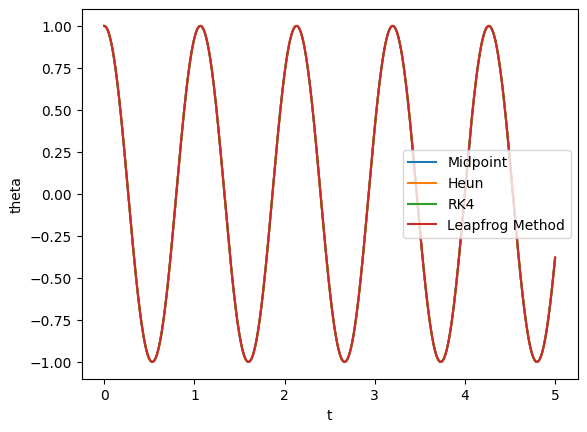

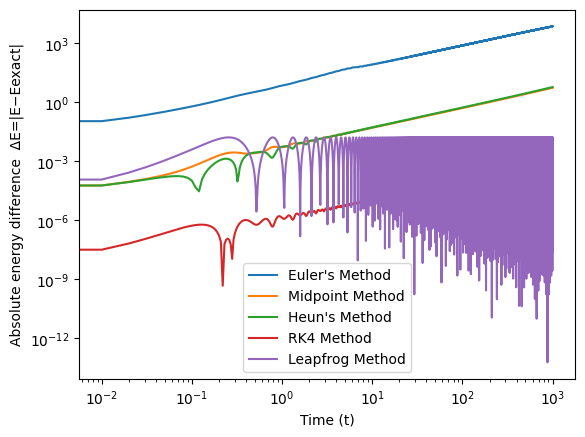

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

omega = 2 * np.pi
theta0 = np.array([1, 0])

def f(t, y):
    theta1, theta2 = y
    return np.array([theta2, -omega**2 * np.sin(theta1)])

def midpoint(num_steps, y0):
    t0, tf = 0, 5
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = t[1] - t[0]

    y = np.zeros((num_steps + 1, 2))
    y[0] = y0

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti + 0.5 * h, yi + 0.5 * h * k1)

        y[i+1] = yi + h * k2

    return t, y

def Heun(num_steps, y0):
    t0, tf = 0, 5
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = t[1] - t[0]

    y = np.zeros((num_steps + 1, 2))
    y[0] = y0

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti + h, yi + h * k1)
        k = 0.5 * (k1 + k2)

        y[i+1] = yi + h * k

    return t, y

def RK4(num_steps, y0):
    t0, tf = 0, 5
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = t[1] - t[0]

    y = np.zeros((num_steps + 1, 2))
    y[0] = y0

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti + h/2, yi + h * k1/2)
        k3 = f(ti + h/2, yi + h * k2/2)
        k4 = f(ti + h, yi + h * k3)
        k = (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)

        y[i+1] = yi + h * k

    return t, y

def accel(t, x):
    return -omega**2 * np.sin(x)

def leapfrog(num_steps):
    t0, tf = 0, 5
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = t[1] - t[0]

    x = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)
    x[0] = x0
    v[0] = v0

    a = accel(t0, x0)

    for i in range(num_steps):
        v_half = v[i] + h/2 * a
        x[i+1] = x[i] + h * v_half
        a = accel(t[i+1], x[i+1])
        v[i+1] = v_half + h/2 * a

    return t, x, v

# Leapfrog method (from your original code)
t_leapfrog, x_leapfrog, v_leapfrog = leapfrog(1000)

# Numerical solutions and plotting for Part A
t1, y1 = midpoint(1000, theta0)
t2, y2 = Heun(1000, theta0)
t3, y3 = RK4(1000, theta0)

plt.plot(t1, y1[:, 0], label='Midpoint')
plt.plot(t2, y2[:, 0], label='Heun')
plt.plot(t3, y3[:, 0], label='RK4')
plt.plot(t_leapfrog, x_leapfrog, label='Leapfrog Method')
plt.xlabel('t')
plt.ylabel('theta')
plt.legend()
plt.show()

# Part B: Different numerical methods
omega = 2 * np.pi
theta0 = np.array([1, 0])
N = 10**5

def f(t, y):
    theta1, theta2 = y
    return np.array([theta2, -omega**2 * np.sin(theta1)])

def e_calc(theta_p, theta):
    KE = 0.5 * theta_p**2
    PE = omega**2 * (1 - np.cos(theta))
    return KE + PE

def Euler(num_steps, y0):
    t0, tf = 0, 1000
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = t[1] - t[0]

    y = np.zeros((num_steps + 1, 2))
    y[0] = y0

    e_exact = e_calc(y[0, 1], y[0, 0])
    e_diff = []

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)

        y[i+1] = yi + h * k1

        e_numerical = e_calc(y[i+1, 1], y[i+1, 0])
        e_diff.append(np.abs(e_numerical - e_exact))

    return t[:-1], e_diff

def midpoint(num_steps, y0):
    t0, tf = 0, 1000
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = t[1] - t[0]

    y = np.zeros((num_steps + 1, 2))
    y[0] = y0

    e_exact = e_calc(y[0, 1], y[0, 0])
    e_diff = []

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti + 0.5 * h, yi + 0.5 * h * k1)

        y[i+1] = yi + h * k2

        e_numerical = e_calc(y[i+1, 1], y[i+1, 0])
        e_diff.append(np.abs(e_numerical - e_exact))

    return t[:-1], e_diff

def Heun(num_steps, y0):
    t0, tf = 0, 1000
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = t[1] - t[0]

    y = np.zeros((num_steps + 1, 2))
    y[0] = y0

    e_exact = e_calc(y[0, 1], y[0, 0])
    e_diff = []

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti + h, yi + h * k1)
        k = 0.5 * (k1 + k2)

        y[i+1] = yi + h * k

        e_numerical = e_calc(y[i+1, 1], y[i+1, 0])
        e_diff.append(np.abs(e_numerical - e_exact))

    return t[:-1], e_diff

def RK4(num_steps, y0):
    t0, tf = 0, 1000
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = t[1] - t[0]

    y = np.zeros((num_steps + 1, 2))
    y[0] = y0

    e_exact = e_calc(y[0, 1], y[0, 0])
    e_diff = []

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]

        k1 = f(ti, yi)
        k2 = f(ti + h/2, yi + h * k1/2)
        k3 = f(ti + h/2, yi + h * k2/2)
        k4 = f(ti + h, yi + h * k3)
        k = (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)

        y[i+1] = yi + h * k

        e_numerical = e_calc(y[i+1, 1], y[i+1, 0])
        e_diff.append(np.abs(e_numerical - e_exact))

    return t[:-1], e_diff

def leapfrog(num_steps):
    t0, tf = 0, 1000
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = t[1] - t[0]

    x = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)
    x[0] = x0
    v[0] = v0

    a = accel(t0, x0)

    e_exact = e_calc(v0, x0)
    e_diff = []

    for i in range(num_steps):
        v_half = v[i] + h/2 * a
        x[i+1] = x[i] + h * v_half
        a = accel(t[i+1], x[i+1])
        v[i+1] = v_half + h/2 * a

        e_numerical = e_calc(v[i+1], x[i+1])
        e_diff.append(np.abs(e_numerical - e_exact))

    return t[:-1], e_diff

# Numerical solutions and plotting for Part B
t1, y1 = Euler(N, theta0)
t2, y2 = midpoint(N, theta0)
t3, y3 = Heun(N, theta0)
t4, y4 = RK4(N, theta0)
t5, y5 = leapfrog(N)

plt.loglog(t1, y1, label="Euler's Method")
plt.loglog(t2, y2, label="Midpoint Method")
plt.loglog(t3, y3, label="Heun's Method")
plt.loglog(t4, y4, label="RK4 Method")
plt.loglog(t5, y5, label="Leapfrog Method")

plt.xlabel('Time (t)')
plt.ylabel('Absolute energy difference  ΔE=|E−Eexact|')
plt.legend()
plt.show()
